<a href="https://colab.research.google.com/github/JonPaulBIlbao/ML-Finance-DBS/blob/Machine-Learning-in-Finance-DBS/PCA_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in Finance 2024/25  
## PCA Step-by-Step in Python  
This notebook performs PCA manually: data standardization, eigen decomposition, component scores, and reconstruction.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from numpy.linalg import eig
import seaborn as sns

## Load data and show summary statistics

In [3]:
url = "https://raw.githubusercontent.com/JonPaulBIlbao/ML-Finance-DBS/Machine-Learning-in-Finance-DBS/pca_efa/PCA_2_var.csv"
data = pd.read_csv(url, sep=';', decimal=',')[['v1', 'v2']]

print(data.info())
print(data.describe())
print("Standard Deviations:\n", data.std())
print("Variances:\n", data.var())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      50 non-null     float64
 1   v2      50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes
None
              v1          v2
count  50.000000   50.000000
mean    7.444000  211.300000
std     3.866769  100.253049
min     0.900000   43.800000
25%     4.225000  148.850000
50%     7.300000  197.600000
75%    10.100000  282.575000
max    15.800000  485.300000
Standard Deviations:
 v1      3.866769
v2    100.253049
dtype: float64
Variances:
 v1       14.951902
v2    10050.673878
dtype: float64


## Scatter plot of original variables

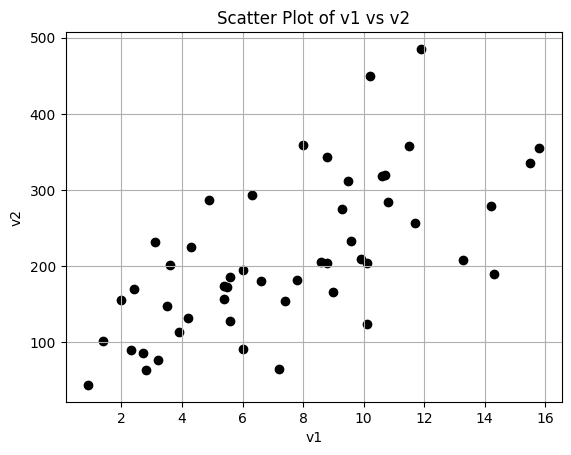

In [4]:
plt.scatter(data['v1'], data['v2'], color='black')
plt.title("Scatter Plot of v1 vs v2")
plt.xlabel("v1")
plt.ylabel("v2")
plt.grid(True)
plt.show()

## Standardization

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_v1', 'scaled_v2'])

print(scaled_df.describe())
print("Variances of standardized data:\n", scaled_df.var(ddof=0))

          scaled_v1     scaled_v2
count  5.000000e+01  5.000000e+01
mean   6.661338e-18 -1.187939e-16
std    1.010153e+00  1.010153e+00
min   -1.709551e+00 -1.687735e+00
25%   -8.409298e-01 -6.292480e-01
50%   -3.761848e-02 -1.380416e-01
75%    6.938519e-01  7.181689e-01
max    2.182917e+00  2.760832e+00
Variances of standardized data:
 scaled_v1    1.0
scaled_v2    1.0
dtype: float64


## Scatter plot of standardized variables

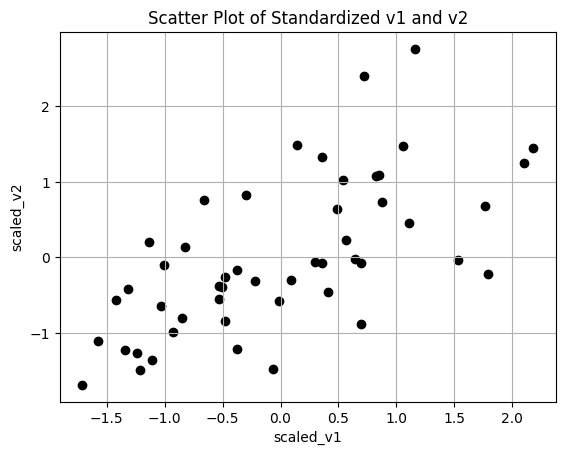

In [6]:
plt.scatter(scaled_df['scaled_v1'], scaled_df['scaled_v2'], color='black')
plt.title("Scatter Plot of Standardized v1 and v2")
plt.xlabel("scaled_v1")
plt.ylabel("scaled_v2")
plt.grid(True)
plt.show()

## Correlation matrix and eigen decomposition

In [7]:
R = np.corrcoef(scaled_data.T)
print("Correlation matrix R:\n", R)
print("Trace of R:", np.trace(R))

eigenvalues, eigenvectors = eig(R)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors (columns):\n", eigenvectors)

Correlation matrix R:
 [[1.         0.64855048]
 [0.64855048 1.        ]]
Trace of R: 1.9999999999999996
Eigenvalues:
 [1.64855048 0.35144952]
Eigenvectors (columns):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Diagonal matrix of eigenvalues and verification

In [8]:
Lambda = np.diag(eigenvalues)
print("Diagonal matrix Lambda:\n", Lambda)
print("Trace of Lambda:", np.trace(Lambda))

print("Check U.T @ U (should be identity):\n", np.round(eigenvectors.T @ eigenvectors, 4))

Diagonal matrix Lambda:
 [[1.64855048 0.        ]
 [0.         0.35144952]]
Trace of Lambda: 1.9999999999999996
Check U.T @ U (should be identity):
 [[1. 0.]
 [0. 1.]]


## Reconstruct the correlation matrix

In [9]:
reconstructed_R = eigenvectors @ Lambda @ eigenvectors.T
print("Reconstructed R:\n", reconstructed_R)
print("Difference from original R:\n", R - reconstructed_R)

Reconstructed R:
 [[1.         0.64855048]
 [0.64855048 1.        ]]
Difference from original R:
 [[2.22044605e-16 1.11022302e-16]
 [1.11022302e-16 2.22044605e-16]]


## Compute component loadings

In [10]:
loadings = eigenvectors @ np.sqrt(Lambda)
print("Loadings:\n", loadings)

print("Loadings.T @ Loadings:\n", loadings.T @ loadings)
print("Loadings @ Loadings.T:\n", loadings @ loadings.T)

Loadings:
 [[ 0.90789605 -0.41919537]
 [ 0.90789605  0.41919537]]
Loadings.T @ Loadings:
 [[1.64855048e+00 2.32784976e-17]
 [2.32784976e-17 3.51449518e-01]]
Loadings @ Loadings.T:
 [[1.         0.64855048]
 [0.64855048 1.        ]]


## PCA scores (manual projection)

In [12]:
z_manual = (data - data.mean()) / data.std(ddof=1)
print(z_manual.head())

         v1        v2
0  1.747195  0.668309
1  0.867908  0.725165
2  0.531710  1.007451
3  0.350680 -0.078801
4  1.048938  1.463297


In [22]:
pca_scores = np.asarray(z_manual @ eigenvectors)
pca_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])
print(pca_df.dtypes)
print(pca_df.describe().round(4))


PC1    float64
PC2    float64
dtype: object
           PC1      PC2
count  50.0000  50.0000
mean   -0.0000  -0.0000
std     1.2840   0.5928
min    -2.3781  -1.4103
25%    -1.0433  -0.3756
50%    -0.1414   0.0023
75%     1.0949   0.3198
max     2.7474   1.1733


## Variance and correlation of PCA scores

In [23]:
print(f"Variance PC1: {np.var(pca_df['PC1'], ddof=0):.4f}")
print(f"Variance PC2: {np.var(pca_df['PC2'], ddof=0):.4f}")
print(f"Correlation PC1-PC2: {np.corrcoef(pca_df['PC1'], pca_df['PC2'])[0, 1]:.4f}")


Variance PC1: 1.6156
Variance PC2: 0.3444
Correlation PC1-PC2: 0.0000


## Scatter plot of PCA scores

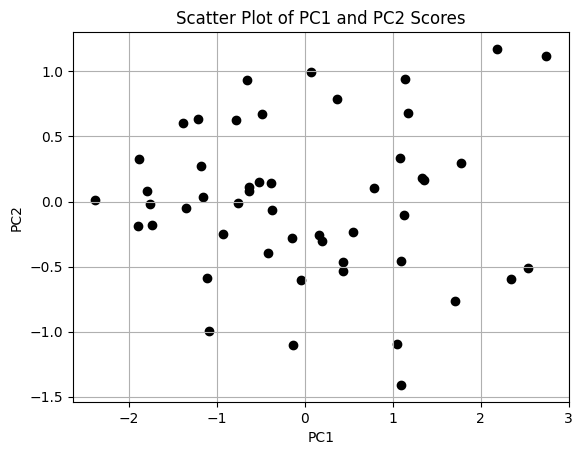

In [24]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='black')
plt.title("Scatter Plot of PC1 and PC2 Scores")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## Standardize PCA scores and plot

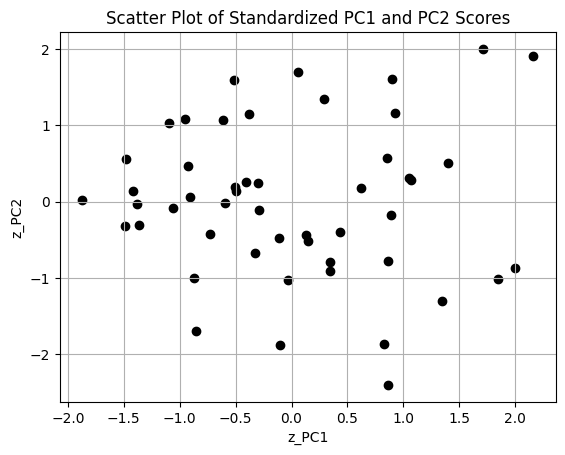

In [25]:
z_pca_scores = pd.DataFrame(zscore(pca_scores), columns=["z_PC1", "z_PC2"])

plt.scatter(z_pca_scores["z_PC1"], z_pca_scores["z_PC2"], color='black')
plt.title("Scatter Plot of Standardized PC1 and PC2 Scores")
plt.xlabel("z_PC1")
plt.ylabel("z_PC2")
plt.grid(True)
plt.show()

## Correlation between original variables and PCA components

In [26]:
print("Cor(data, PC1):", np.corrcoef(data.values.T, pca_df.iloc[:, 0])[0:2, 2])
print("Cor(data, PC2):", np.corrcoef(data.values.T, pca_df.iloc[:, 1])[0:2, 2])

Cor(data, PC1): [0.90789605 0.90789605]
Cor(data, PC2): [-0.41919537  0.41919537]


## Correlation matrix of PCA scores

In [27]:
print("Correlation matrix of PCA scores:\n", np.corrcoef(pca_df.T))

Correlation matrix of PCA scores:
 [[1.00000000e+00 2.38974645e-16]
 [2.38974645e-16 1.00000000e+00]]
